# Call Library

In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import Data

In [11]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# Descriptive Statistics
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 1. Preprocessing Data

In [13]:
#Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Fill in the missing values in 'Age' Column with Median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [16]:
# Fill in the missing values in 'Embarked' Column with Mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
# Remove "Name", "Cabin" and "Ticket" columns because it will not be used for analysis
df = df.drop(columns=["Name", "Cabin", "Ticket"], errors='ignore')
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


In [18]:
#Check missing values again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# 2. Explore Data Analysis (EDA)

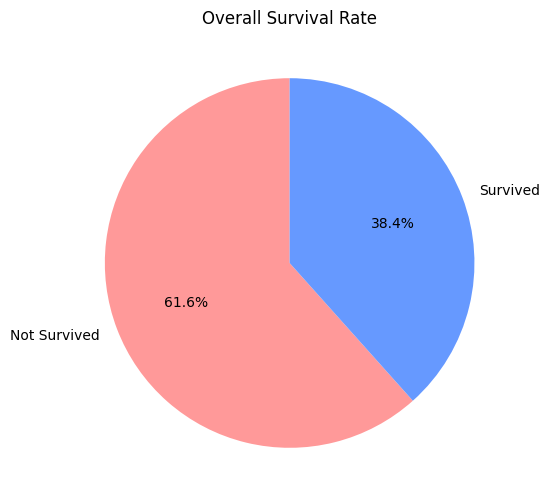

In [20]:
# Calculate the counts of survived vs. not survived
survived_counts = df['Survived'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#6699FF'])
plt.title('Overall Survival Rate')
plt.show()

* 61.6% of the individuals did not survive (shown in pink).
* 38.4% of the individuals survived (shown in blue).

The data highlights that the majority of individuals did not survive, while a smaller portion did.

## a. Suvival by 'Age'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


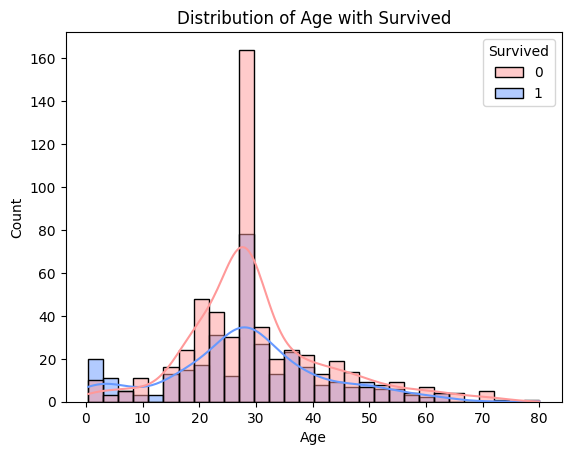

In [21]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, palette={0: '#FF9999', 1: '#6699FF'})
plt.title('Distribution of Age with Survived')
plt.show()

* Younger children had a higher chance of survival, which could suggest that they were prioritized during rescue efforts.
* Most of the passengers who did not survive were concentrated in the young adult age group (20-30 years), possibly due to the higher number of passengers in that age range on board.

This visualization effectively illustrates that age was a factor in survival outcomes, with younger children having a higher chance of survival and young adults facing a higher risk of not surviving.

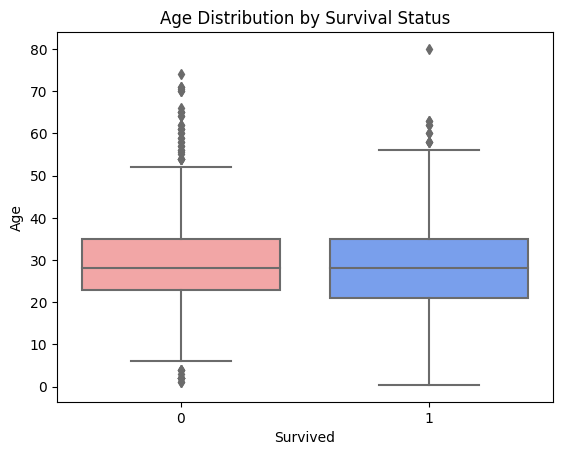

In [22]:
sns.boxplot(data=df, x='Survived', y='Age', palette={0: '#FF9999', 1: '#6699FF'})
plt.title('Age Distribution by Survival Status')
plt.show()

* The median ages for both survivors and non-survivors are similar, indicating that age alone may not have strongly influenced survival rates.
* Both groups show a wide range of ages, but the range for survivors extends slightly higher. Non-survivors also have a larger interquartile range, suggesting more variation in age among those who did not survive.
* Both groups contain outliers, especially for older ages, indicating that a few elderly passengers were either survivors or non-survivors.

In summary, age distribution appears similar for survivors and non-survivors, suggesting that age may not have been a significant factor in survival. However, there is slightly more age variability among non-survivors.

## b. Survival by 'Fare'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


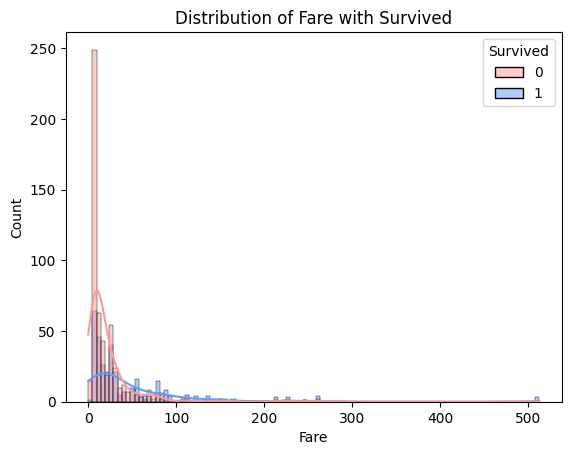

In [23]:
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, palette={0: '#FF9999', 1: '#6699FF'})
plt.title('Distribution of Fare with Survived')
plt.show()

* Most passengers, regardless of survival status, paid lower fares, with a high concentration around the lower end of the fare scale (around 0–50). This suggests that the majority of passengers likely paid a more affordable fare.
* There appears to be a small number of survivors among those who paid higher fares, which indicates a possible correlation between higher fares and increased survival rates. However, as the fares increase beyond 100, the count decreases, implying fewer passengers paid these higher amounts.
* A large portion of non-survivors paid very low fares, indicating that lower-fare passengers had a higher proportion of non-survivors.

In summary, the distribution shows that a higher fare might be associated with a better survival rate, although the majority of passengers paid low fares, and survival among this group was generally lower.

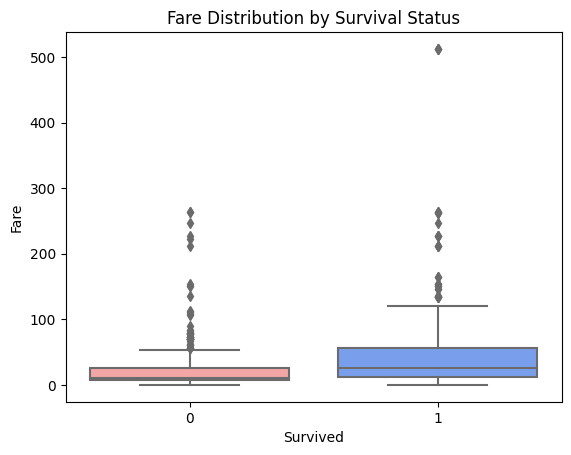

In [24]:
sns.boxplot(data=df, x='Survived', y='Fare', palette={0: '#FF9999', 1: '#6699FF'})
plt.title('Fare Distribution by Survival Status')
plt.show()

* The median fare for survivors (1) is noticeably higher than for non-survivors (0). This suggests that passengers who paid higher fares were more likely to survive.
* The fare range for survivors is wider than for non-survivors. Survivors have a larger interquartile range (the middle 50% of data), indicating more variability in fares among those who survived.
* Both groups have outliers, with one extreme outlier among the survivors paying over 500. These outliers highlight passengers who paid much more than the average fare.

In summary, the plot suggests that paying a higher fare may be linked to a higher survival rate, with survivors generally having paid more than non-survivors.

## c. Survival by 'Passenger Class'

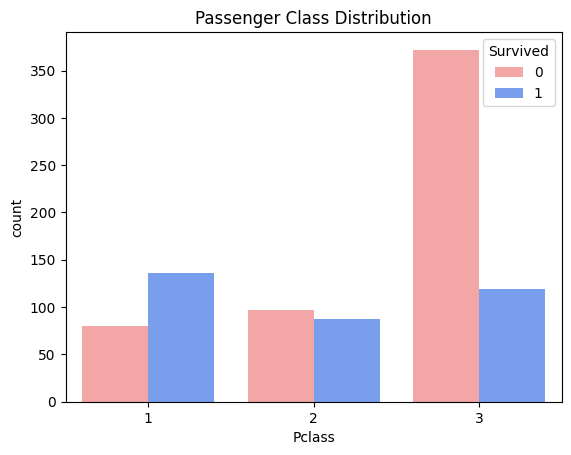

In [25]:
# Count plot for categorical features
sns.countplot(data=df, x='Pclass', hue='Survived', palette={0: '#FF9999', 1: '#6699FF'})
plt.title('Passenger Class Distribution')
plt.show()

* 1st Class: More passengers survived (blue) than didn't (pink), indicating a higher survival rate.
* 2nd Class: Survival and non-survival counts are almost balanced.
* 3rd Class: Most passengers didn't survive, suggesting a lower survival rate.

Overall, passengers in higher classes (1st class) had a better chance of survival than those in lower classes (3rd class).

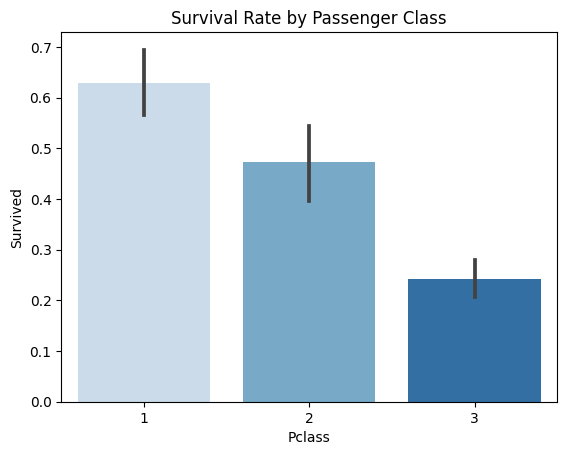

In [26]:
sns.barplot(data=df, x='Pclass', y='Survived', palette='Blues')
plt.title('Survival Rate by Passenger Class')
plt.show()

The percentage of people who survived in Pclass = 1 is higher than in Pclass 2 and 3, it means that higher-class passengers had a better chance of survival.

## d. Survival by 'Sex'

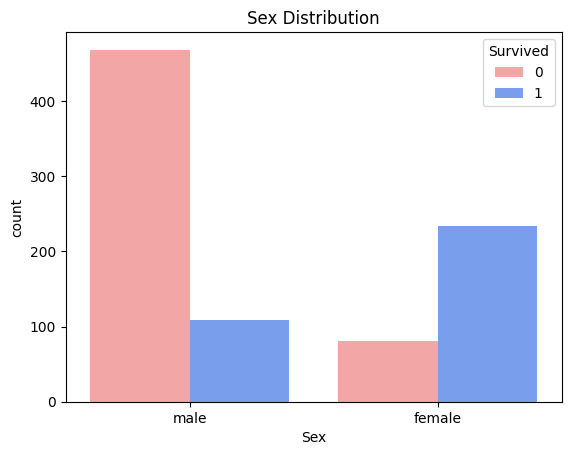

In [27]:
# Count plot for categorical features
sns.countplot(data=df, x='Sex', hue='Survived', palette={0: '#FF9999', 1: '#6699FF'})
plt.title('Sex Distribution')
plt.show()

* Male: A large majority did not survive (shown in pink) compared to a smaller portion who survived (shown in blue). This indicates that most male individuals did not survive.
* Female: The survival rate is higher among females, with more individuals surviving (shown in blue) than not surviving (shown in pink).

Overall, the chart suggests that females had a higher survival rate than males.

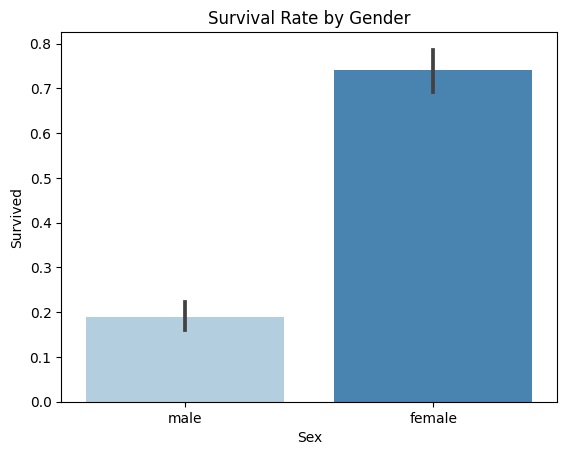

In [28]:
sns.barplot(data=df, x='Sex', y='Survived', palette='Blues')
plt.title('Survival Rate by Gender')
plt.show()

According to the percentage, female had a higher survival rate than male.

## Correlation Matrix

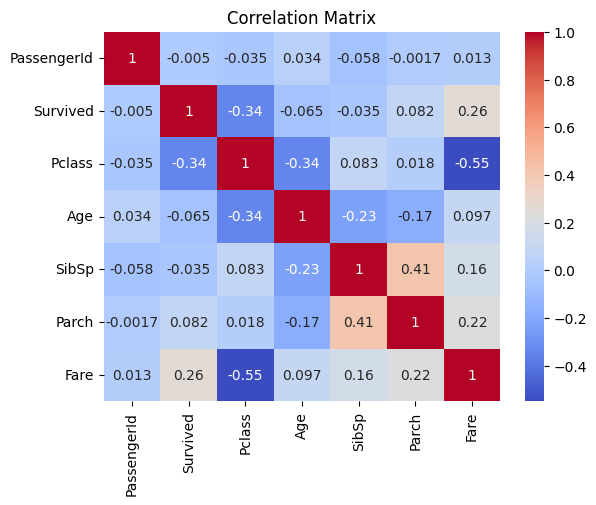

In [29]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* Pclass and Fare have a negative correlation: the lower the Pclass (indicating higher social class), the higher the Fare.
* The feature with the greatest impact on Survived is Pclass.

# 3. Feature Engineering

## a. Label Encoder: convert categorical data into numeric

In [30]:
# Import library label encoder
from sklearn.preprocessing import LabelEncoder

In [31]:
# Convert the 'Sex' and 'Embarked' columns into numeric values
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [32]:
# Data after label encoding
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


## b. Feature Selection

In [34]:
# Create features for modelling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [35]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## c. Train Test Split

In [37]:
# Import library for splitting data
from sklearn.model_selection import train_test_split

# Splitting data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data train

In [38]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [39]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

### Data test

In [40]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [41]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# 4. Modeling & Evaluation

## Random Forest, Decision Tree, Logistic Regression

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[92 13]
 [19 55]]


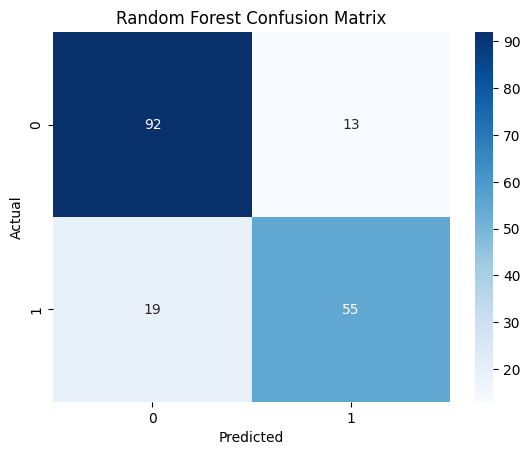

Random Forest Accuracy: 0.82

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

Confusion Matrix:
[[83 22]
 [17 57]]


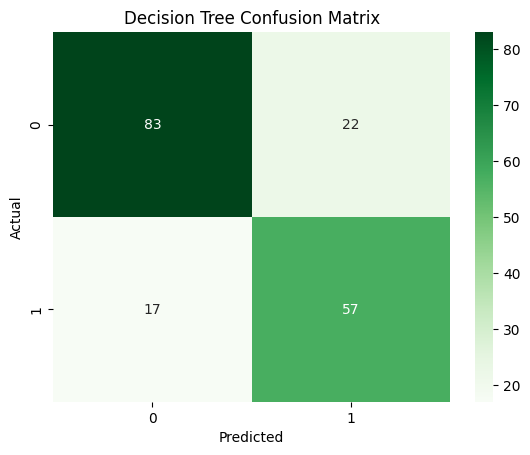

Decision Tree Accuracy: 0.78

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
[[90 15]
 [19 55]]


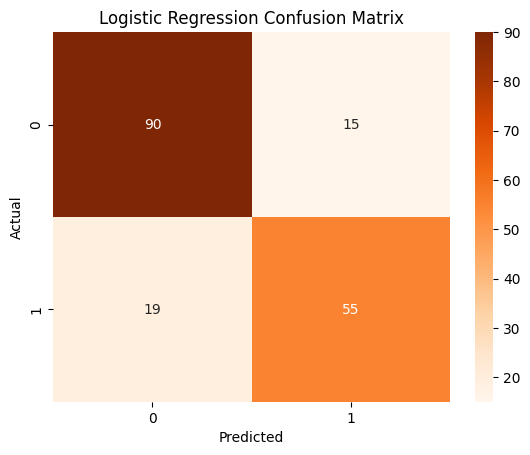

Logistic Regression Accuracy: 0.81


In [42]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are already defined

### Random Forest
# Create Random Forest model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Predictions
y_pred1 = model1.predict(X_test)

# Evaluation
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred1))

# Confusion Matrix for Random Forest
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix1)

# Visualization of Confusion Matrix with heatmap
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Random Forest Accuracy: {accuracy1:.2f}")

### Decision Tree
# Create Decision Tree model
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

# Predictions
y_pred2 = model2.predict(X_test)

# Evaluation
print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, y_pred2))

# Confusion Matrix for Decision Tree
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix2)

# Visualization of Confusion Matrix with heatmap
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Decision Tree Accuracy: {accuracy2:.2f}")

### Logistic Regression
# Create Logistic Regression model
model3 = LogisticRegression(random_state=42, max_iter=1000)
model3.fit(X_train, y_train)

# Predictions
y_pred3 = model3.predict(X_test)

# Evaluation
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred3))

# Confusion Matrix for Logistic Regression
conf_matrix3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix3)

# Visualization of Confusion Matrix with heatmap
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Accuracy
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Logistic Regression Accuracy: {accuracy3:.2f}")

### Feature Importance (Random Forest)

In [43]:
# Ensure model is an instance of RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importance = model.feature_importances_

# Extract feature names from the training data
feature_names = X_train.columns

# Create a DataFrame to display feature importance
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by feature importance
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044


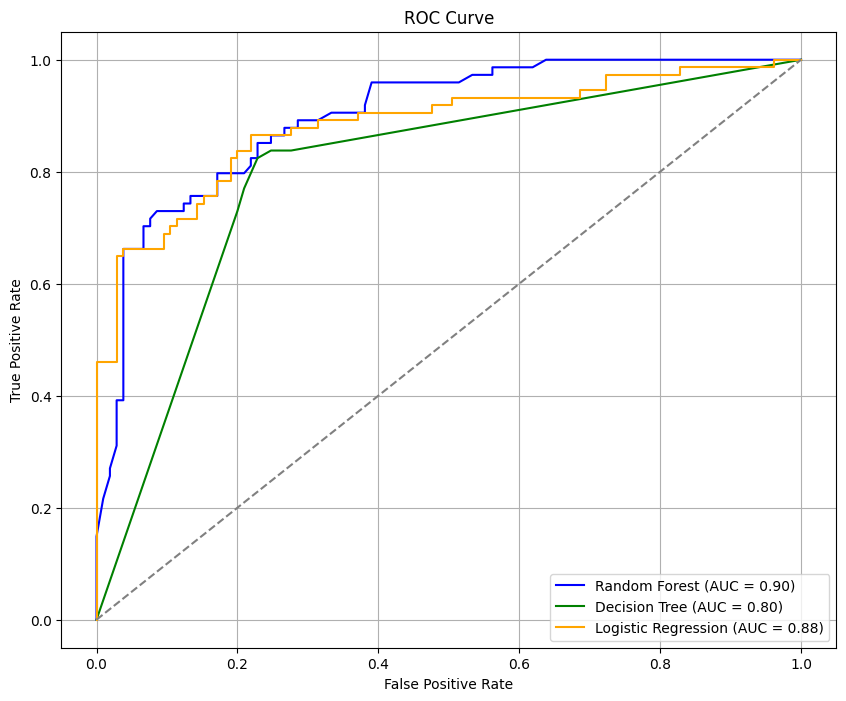

In [44]:
# Import necessary libraries for ROC and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined and models are trained

# Plotting ROC curves for all three models
plt.figure(figsize=(10, 8))

# Random Forest
y_pred_proba1 = model1.predict_proba(X_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1)
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, color='blue', label=f'Random Forest (AUC = {roc_auc1:.2f})')

# Decision Tree
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, color='green', label=f'Decision Tree (AUC = {roc_auc2:.2f})')

# Logistic Regression
y_pred_proba3 = model3.predict_proba(X_test)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, y_pred_proba3)
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, color='orange', label=f'Logistic Regression (AUC = {roc_auc3:.2f})')

# Plotting configurations
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


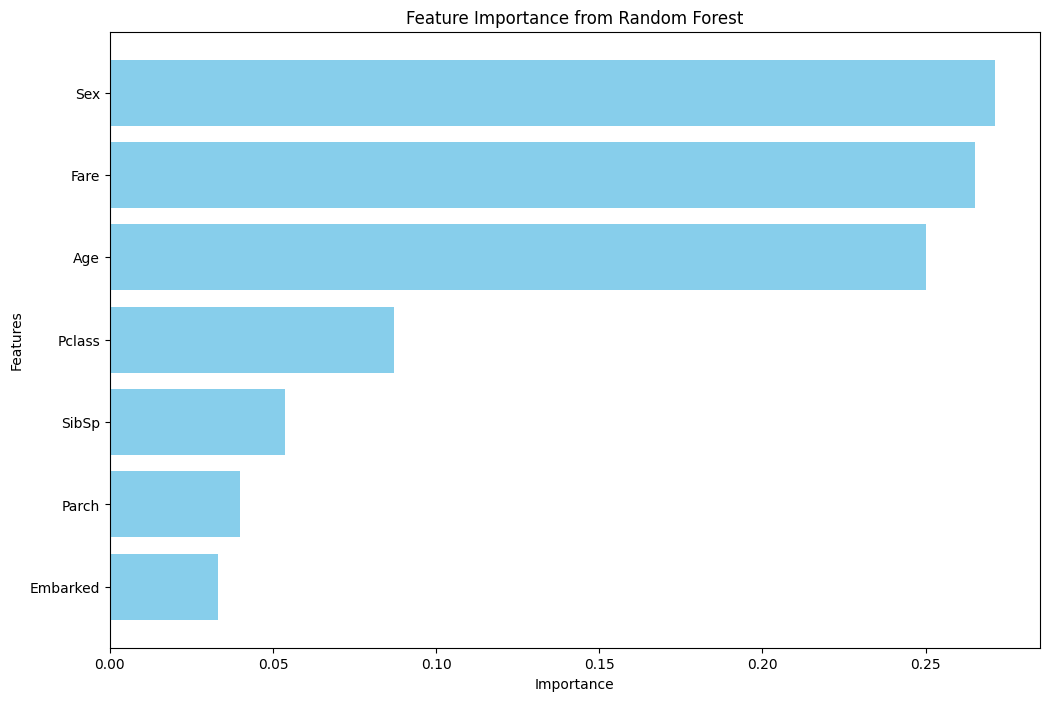

In [45]:
# Assuming df_feature_importance is already created and sorted
plt.figure(figsize=(12, 8))

# Create a bar chart for feature importance
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()